In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
size_dict = {
    "gpt2": 124_000_000,
    "gpt2-medium": 355_000_000,
    "gpt2-large": 774_000_000,
    "gpt2-xl": 1_500_000_000,
    # GPT-3 sizes are based on https://blog.eleuther.ai/gpt3-model-sizes/
    "ada": 350_000_000,
    "babbage": 1_300_000_000,
    "curie": 6_700_000_000,
    "davinci": 175_000_000_000,
    "text-ada-001": 350_000_000,
    "text-babbage-001": 1_300_000_000,
    "text-curie-001": 6_700_000_000,
    "text-davinci-001": 175_000_000_000,
    # gpt neo sizes from their names
    "gpt-neo-125M": 125_000_000,
    "gpt-neo-1.3B": 1_300_000_000,
    "gpt-neo-2.7B": 2_700_000_000,
    "gpt-j-6B": 6_000_000_000,
    # opt sizes from their names
    "opt-125m": 125_000_000,
    "opt-350m": 350_000_000,
    "opt-1.3b": 1_300_000_000,
    "opt-2.7b": 2_700_000_000,
    "opt-6.7b": 6_700_000_000,
    "opt-13b": 13_000_000_000,
}

In [11]:
df = pd.read_csv('model_evaluation.csv')
Y = df.pop('gt')
df.pop('questions');
df.pop('Unnamed: 0');

In [12]:
are_correct = df.eq(Y, axis=0)

In [13]:
avgs = are_correct.mean(axis=0)

In [14]:
avgs

ada    0.954545
dtype: float64

In [15]:
def plot_model_performance_vs_size(performance_data, size_dict):
    # Filter size_dict to only include models in the performance_data
    filtered_size_dict = {
        model: size for model, size in size_dict.items() if model in performance_data.index
    }

    # Separate data for models with and without 'text' in their names
    x_without_text = [filtered_size_dict[model] for model in performance_data.index if "text" not in model]
    y_without_text = [performance_data[model] for model in performance_data.index if "text" not in model]

    x_with_text = [filtered_size_dict[model] for model in performance_data.index if "text" in model]
    y_with_text = [performance_data[model] for model in performance_data.index if "text" in model]

    # Create the plot
    plt.figure(figsize=(10, 5))
    plt.plot(x_without_text, y_without_text, linestyle='-', linewidth=2, color='blue')
    plt.scatter(x_without_text, y_without_text, marker='x', s=100, color='blue', label='Base models')

    plt.plot(x_with_text, y_with_text, linestyle='-', linewidth=2, color='red')
    plt.scatter(x_with_text, y_with_text, marker='x', s=100, color='red', label='FeedME models')

    # Customize the plot
    plt.xscale('log')
    plt.xticks(x_without_text, [i for i in performance_data.index if 'text' not in i], rotation=45)
    plt.yticks([i / 10 for i in range(11)])
    plt.ylim(0, 1)
    plt.xlabel('Model Size')
    plt.ylabel('Performance')
    plt.title('Performance vs Model Size')
    plt.legend()

    # Show the plot
    plt.show()
    

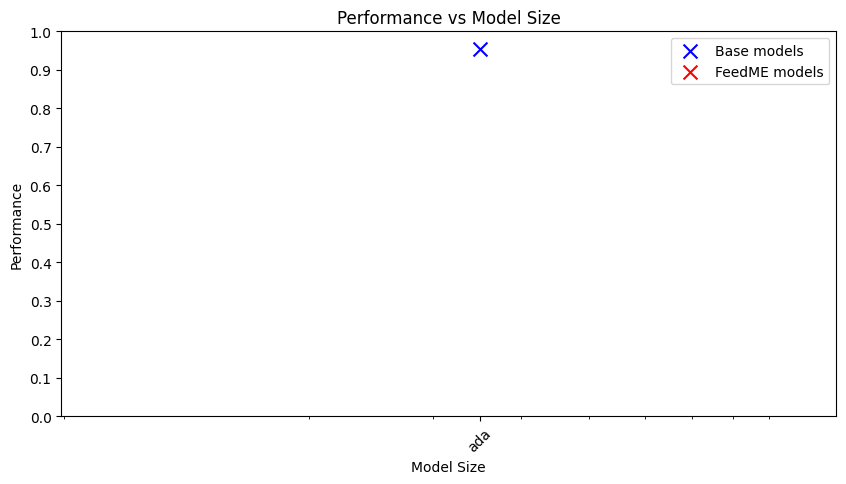

In [16]:
plot_model_performance_vs_size(avgs, size_dict)